# Introduction to Pandas

Tamás Gál (tamas.gal@fau.de)

The latest version of this notebook is available at [https://github.com/escape2020/school2021](https://github.com/escape2020/school2022)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as ml
import sys
plt = ml.pyplot
ml.rcParams['figure.figsize'] = (10.0, 5.0)

print(f"Python version: {sys.version}\n"
      f"Pandas version: {pd.__version__}\n"
      f"NumPy version: {np.__version__}\n"
      f"Matplotlib version: {ml.__version__}\n")

rng = np.random.default_rng(42)  # initialise our random number generator

Python version: 3.9.12 (main, Mar 26 2022, 15:44:31) 
[Clang 13.1.6 (clang-1316.0.21.2)]
Pandas version: 1.4.2
NumPy version: 1.22.4
Matplotlib version: 3.5.2



In [2]:
from IPython.core.magic import register_line_magic

@register_line_magic
def shorterr(line):
    """Show only the exception message if one is raised."""
    try:
        output = eval(line)
    except Exception as e:
        print("\x1b[31m\x1b[1m{e.__class__.__name__}: {e}\x1b[0m".format(e=e))
    else:
        return output
    
del shorterr

## The basic data structures in Pandas

### `DataFrame`

In [3]:
data = [1, 2, 3, 4]
pd.DataFrame(data)

,0
0,1
1,2
2,3
3,4


In [4]:
data = {'a': [1, 2, 3],
        'b': [4.1, 5.2, 6.3],
        'c': ['foo', 'bar', 'baz'],
        'd': 42}

In [5]:
df = pd.DataFrame(data)
df

,a,b,c,d
0,1,4.1,foo,42
1,2,5.2,bar,42
2,3,6.3,baz,42


In [6]:
type(df)

pandas.core.frame.DataFrame

### `Series`

In [7]:
df['a']

0    1
1    2
2    3
Name: a, dtype: int64

In [8]:
type(df['a'])  

pandas.core.series.Series

In [9]:
df['a'] * 23

0    23
1    46
2    69
Name: a, dtype: int64

In [10]:
np.cos(df['a'])

0    0.540302
1   -0.416147
2   -0.989992
Name: a, dtype: float64

In [11]:
s = pd.Series(rng.integers(0, 10, 5))
s

0    0
1    7
2    6
3    4
4    4
dtype: int64

In [12]:
s.sort_values()  # indices are kept!

0    0
3    4
4    4
2    6
1    7
dtype: int64

In [13]:
s * s.sort_values()  # and are used to match elements

0     0
1    49
2    36
3    16
4    16
dtype: int64

In [14]:
s * s.sort_values().reset_index(drop=True)

0     0
1    28
2    24
3    24
4    28
dtype: int64

## Examining a `DataFrame`

In [15]:
df

,a,b,c,d
0,1,4.1,foo,42
1,2,5.2,bar,42
2,3,6.3,baz,42


In [16]:
df.dtypes

a      int64
b    float64
c     object
d      int64
dtype: object

In [17]:
df.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

In [18]:
df.shape

(3, 4)

### Looking into the data

In [19]:
df.head(2)

,a,b,c,d
0,1,4.1,foo,42
1,2,5.2,bar,42


In [20]:
df.tail(2)

,a,b,c,d
1,2,5.2,bar,42
2,3,6.3,baz,42


In [21]:
df.describe()

,a,b,d
count,3.0,3.00,3.0
mean,2.0,5.20,42.0
std,1.0,1.10,0.0
min,1.0,4.10,42.0
25%,1.5,4.65,42.0
50%,2.0,5.20,42.0
75%,2.5,5.75,42.0
max,3.0,6.30,42.0


## Indexing and Slicing

There are different ways to index/slice data in pandas, which is a bit confusing at first.

In [22]:
df.loc

In [23]:
df.iloc

In [24]:
df.at

In [25]:
df.iat

### Using `.loc[]`

This one treats the input as label or "row-name".

In [26]:
df.loc[2]

a      3
b    6.3
c    baz
d     42
Name: 2, dtype: object

In [27]:
df['b'].loc[2]

6.3

In [28]:
%shorterr df.loc[-1]

KeyError: -1


#### Accessing multiple rows/columns

In [29]:
df.loc[[1, 2], ['b', 'd']]

,b,d
1,5.2,42
2,6.3,42


In [30]:
df.loc[1:3, ['a']]

,a
1,2
2,3


### Using `.iloc[]`

In [31]:
df.iloc[2]  # index of row

a      3
b    6.3
c    baz
d     42
Name: 2, dtype: object

In [32]:
df.iloc[-1]

a      3
b    6.3
c    baz
d     42
Name: 2, dtype: object

### Using `.at[]` (for single value lookups, label-based)

In [33]:
df

,a,b,c,d
0,1,4.1,foo,42
1,2,5.2,bar,42
2,3,6.3,baz,42


In [34]:
df.at[2, 'b']

6.3

### Using `.iat[]`  (for single value lookups, integer-based)

In [35]:
df

,a,b,c,d
0,1,4.1,foo,42
1,2,5.2,bar,42
2,3,6.3,baz,42


In [36]:
df.iat[2, 1]

6.3

## Grouped operations

In [37]:
df = pd.DataFrame({'location' : ['Italy', 'France', 'Italy', 'Italy',
                                 'France', 'Italy', 'France', 'France'],
                   'detector' : ['ARCA_DU1', 'ORCA_DU2', 'ARCA_DU3', 'ARCA_DU4',
                                 'ANTARES', 'NEMO', 'ORCA_DU1', 'ORCA_DU5'],
                   'x' : rng.random(8),
                   'y' : rng.random(8)})
df

,location,detector,x,y
0,Italy,ARCA_DU1,0.697368,0.926765
1,France,ORCA_DU2,0.094177,0.643865
2,Italy,ARCA_DU3,0.975622,0.822762
3,Italy,ARCA_DU4,0.761140,0.443414
4,France,ANTARES,0.786064,0.227239
5,Italy,NEMO,0.128114,0.554585
6,France,ORCA_DU1,0.450386,0.063817
7,France,ORCA_DU5,0.370798,0.827631


In [38]:
df.groupby(['location']).groups

{'France': [1, 4, 6, 7], 'Italy': [0, 2, 3, 5]}

In [39]:
df.groupby(['location']).get_group('France')

,location,detector,x,y
1,France,ORCA_DU2,0.094177,0.643865
4,France,ANTARES,0.786064,0.227239
6,France,ORCA_DU1,0.450386,0.063817
7,France,ORCA_DU5,0.370798,0.827631


In [40]:
df = pd.DataFrame({
    'event_id': [1, 1, 1, 2, 2, 3, 3, 3, 3],
    'hit_time': [23, 13, 14, 44, 23, 45, 1, 2, 4],
    'pmt_id': [4, 3, 5, 30, 5, 5, 3, 5, 3]
})
df

,event_id,hit_time,pmt_id
0,1,23,4
1,1,13,3
2,1,14,5
3,2,44,30
4,2,23,5
5,3,45,5
6,3,1,3
7,3,2,5
8,3,4,3


In [41]:
df.groupby('event_id')

In [42]:
for name, group_data in df.groupby('event_id'):
    print("Group name: {0}".format(name))
    print(group_data, "\n")

Group name: 1
   event_id  hit_time  pmt_id
0         1        23       4
1         1        13       3
2         1        14       5 

Group name: 2
   event_id  hit_time  pmt_id
3         2        44      30
4         2        23       5 

Group name: 3
   event_id  hit_time  pmt_id
5         3        45       5
6         3         1       3
7         3         2       5
8         3         4       3 



## Aggregations

In [43]:
df.groupby('event_id')["hit_time"].min()

event_id
1    13
2    23
3     1
Name: hit_time, dtype: int64

In [44]:
df.groupby('event_id')["hit_time"].aggregate("min")

event_id
1    13
2    23
3     1
Name: hit_time, dtype: int64

`.aggregate()` and `.agg()` are the same.

In [45]:
df.groupby('event_id')["hit_time"].agg([np.mean, np.median, sum, min, max])

,mean,median,sum,min,max
event_id,,,,,
1,16.666667,14.0,50,13,23
2,33.500000,33.5,67,23,44
3,13.000000,3.0,52,1,45


## Transformations

In [78]:
N = 1000
index = pd.date_range("2021-06-09", periods=N, freq='D')

In [79]:
index

DatetimeIndex(['2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12',
               '2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16',
               '2021-06-17', '2021-06-18',
               ...
               '2024-02-24', '2024-02-25', '2024-02-26', '2024-02-27',
               '2024-02-28', '2024-02-29', '2024-03-01', '2024-03-02',
               '2024-03-03', '2024-03-04'],
              dtype='datetime64[ns]', length=1000, freq='D')

In [48]:
ts = pd.Series(rng.normal(0.5, 2, N), index)

In [49]:
ts

2021-06-09    0.400148
2021-06-10    0.130275
2021-06-11   -0.861859
2021-06-12    2.945083
2021-06-13    0.190941
                ...   
2024-02-29   -1.590087
2024-03-01   -1.542090
2024-03-02    0.604347
2024-03-03   -0.047701
2024-03-04   -0.173664
Freq: D, Length: 1000, dtype: float64

In [50]:
ts.rolling(window=100, min_periods=100).mean()

2021-06-09         NaN
2021-06-10         NaN
2021-06-11         NaN
2021-06-12         NaN
2021-06-13         NaN
                ...   
2024-02-29    0.647233
2024-03-01    0.603662
2024-03-02    0.575979
2024-03-03    0.559914
2024-03-04    0.525909
Freq: D, Length: 1000, dtype: float64

In [51]:
ts = ts.rolling(window=100, min_periods=100).mean().dropna()
ts

2021-09-16    0.371997
2021-09-17    0.368208
2021-09-18    0.351436
2021-09-19    0.368640
2021-09-20    0.348589
                ...   
2024-02-29    0.647233
2024-03-01    0.603662
2024-03-02    0.575979
2024-03-03    0.559914
2024-03-04    0.525909
Freq: D, Length: 901, dtype: float64

#### Let's standardise the data within each group:

In [52]:
transformed = ts.groupby(lambda x: x.year).transform(lambda x: (x - x.mean()) / x.std())

#### Here is our data before the transformation

In [53]:
grouped = ts.groupby(lambda x: x.year)
grouped.mean()

2021    0.348990
2022    0.501918
2023    0.364292
2024    0.492962
dtype: float64

In [54]:
grouped.std()

2021    0.095931
2022    0.113224
2023    0.148435
2024    0.155354
dtype: float64

Our transformation results with each group having a mean of 0 and a standard deviation of 1:

In [55]:
grouped_trans = transformed.groupby(lambda x: x.year)

In [56]:
grouped_trans.mean()

2021    1.348869e-16
2022   -5.170902e-16
2023    1.934526e-16
2024    1.574262e-16
dtype: float64

In [57]:
grouped_trans.std()

2021    1.0
2022    1.0
2023    1.0
2024    1.0
dtype: float64

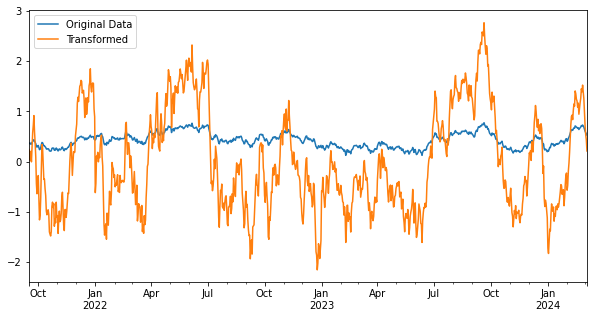

In [58]:
pd.DataFrame({"Original Data": ts, "Transformed": transformed}).plot();

## Plotting

In [59]:
df = pd.DataFrame({'foo': np.cumsum(rng.random(1000) - 0.5),
                   'bar': np.cumsum(rng.random(1000) - 0.5),
                   'narf': np.cumsum(rng.random(1000) - 0.5)})

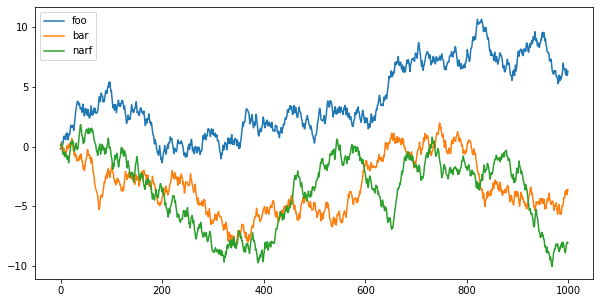

In [60]:
df.plot();  # check out the parameters you can pass to `.plot()` by hitting TAB inside the parentheses

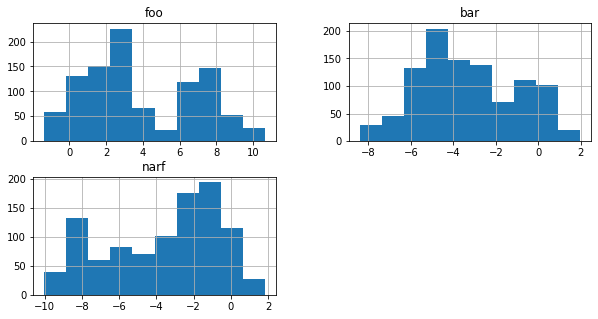

In [61]:
df.hist();

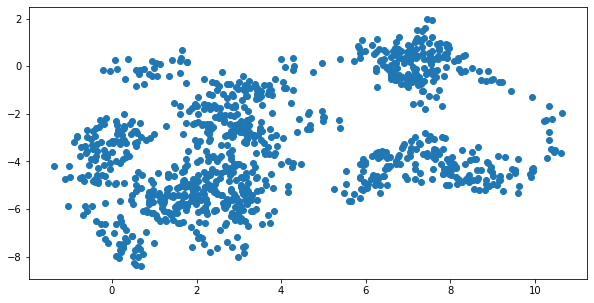

In [62]:
plt.scatter(df['foo'], df['bar']);

### Memory Usage of DataFrames

In [63]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   foo     1000 non-null   float64
 1   bar     1000 non-null   float64
 2   narf    1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [64]:
data = rng.random((10_000_000, 6))

In [65]:
df = pd.DataFrame(data, columns=list("abcdef"))

In [66]:
df

,a,b,c,d,e,f
0,0.828194,0.849657,0.293038,0.953420,0.395115,0.800078
1,0.966820,0.703658,0.161551,0.586137,0.118777,0.789142
2,0.281315,0.695215,0.910090,0.181010,0.392858,0.647119
3,0.419659,0.174819,0.029072,0.406598,0.649209,0.573984
4,0.156241,0.450693,0.369471,0.274202,0.729271,0.309652
...,...,...,...,...,...,...
9999995,0.770127,0.643213,0.402198,0.179221,0.017595,0.493041
9999996,0.587565,0.213154,0.644223,0.649533,0.251439,0.290484
9999997,0.235041,0.664163,0.192866,0.298862,0.391607,0.531926
9999998,0.025383,0.223457,0.049335,0.639165,0.135736,0.486476


In [67]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   a       float64
 1   b       float64
 2   c       float64
 3   d       float64
 4   e       float64
 5   f       float64
dtypes: float64(6)
memory usage: 457.8 MB


In [68]:
df = pd.read_clipboard()  # just for fun, don't use this at home, be reproducible!

In [69]:
df

,(for,single,value,lookups)


In [70]:
df.dtypes

(for        object
single      object
value       object
lookups)    object
dtype: object

### Subsampling

In [71]:
data = rng.random((10_000_000, 6))
df = pd.DataFrame(data, columns=list("abcdef"))

In [72]:
df.head(4)

,a,b,c,d,e,f
0,0.383528,0.094669,0.649027,0.018631,0.950112,0.363188
1,0.260887,0.495653,0.147412,0.289957,0.123670,0.713631
2,0.183114,0.379120,0.401539,0.345529,0.382313,0.598651
3,0.406067,0.762983,0.333730,0.985535,0.210268,0.990990


In [73]:
subsample = df.sample(frac=0.1, random_state=42)
remaining = df.drop(subsample.index)

In [74]:
subsample

,a,b,c,d,e,f
919213,0.981444,0.670593,0.799176,0.221854,0.133561,0.046587
9467153,0.731540,0.194087,0.097984,0.193528,0.700883,0.252044
6585777,0.043974,0.027271,0.540944,0.114875,0.574339,0.852421
3878022,0.136359,0.126004,0.698315,0.686668,0.162250,0.732856
5537116,0.790279,0.513057,0.785461,0.794914,0.236523,0.444994
...,...,...,...,...,...,...
3553239,0.614689,0.333793,0.763363,0.004946,0.464299,0.769746
1662635,0.591635,0.802737,0.048067,0.126506,0.606636,0.033036
2362261,0.590788,0.848337,0.741844,0.370703,0.900171,0.705203
7669748,0.390099,0.385856,0.480086,0.744981,0.602946,0.443879


In [75]:
remaining

,a,b,c,d,e,f
0,0.383528,0.094669,0.649027,0.018631,0.950112,0.363188
1,0.260887,0.495653,0.147412,0.289957,0.123670,0.713631
3,0.406067,0.762983,0.333730,0.985535,0.210268,0.990990
4,0.041271,0.964233,0.470750,0.640519,0.902313,0.895566
5,0.141806,0.129816,0.027587,0.551810,0.940560,0.308025
...,...,...,...,...,...,...
9999995,0.723700,0.260395,0.720816,0.541234,0.554804,0.557226
9999996,0.507502,0.992001,0.083099,0.253293,0.611080,0.433251
9999997,0.363330,0.621927,0.410807,0.563656,0.982160,0.053456
9999998,0.038979,0.071333,0.111380,0.837111,0.877299,0.797864
